In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# load and investigate the data here:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [4]:
# perform exploratory analysis here:
# Looking at all features of all attributes
df.describe(include='all')

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
unique,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ivan Dodig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,NaN,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,NaN,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,NaN,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,NaN,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,NaN,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000


In [5]:
df.shape

(1721, 24)

In [6]:
df_columns = df.columns
df_columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [7]:
df.isna().any()

Player                        False
Year                          False
FirstServe                    False
FirstServePointsWon           False
FirstServeReturnPointsWon     False
SecondServePointsWon          False
SecondServeReturnPointsWon    False
Aces                          False
BreakPointsConverted          False
BreakPointsFaced              False
BreakPointsOpportunities      False
BreakPointsSaved              False
DoubleFaults                  False
ReturnGamesPlayed             False
ReturnGamesWon                False
ReturnPointsWon               False
ServiceGamesPlayed            False
ServiceGamesWon               False
TotalPointsWon                False
TotalServicePointsWon         False
Wins                          False
Losses                        False
Winnings                      False
Ranking                       False
dtype: bool

In [8]:
df['Player'].nunique()

438

<AxesSubplot:>

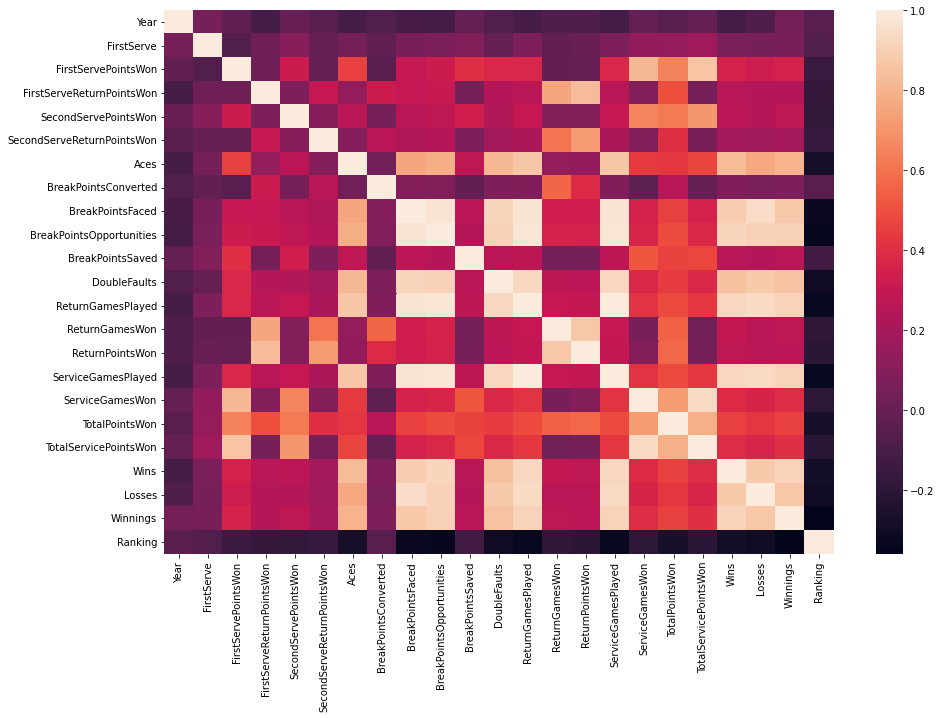

In [9]:
# looking at correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

## Findings
From the correlation map there are lots of correleated points, but interestingly nothing correlated with ranking, which is good in a way. One way to enhance the methods of viewing could be a pair plot. Although this is going to be a lot of graphing.Although there are now lots of graphs, it is possible to see that there are lots of +ve correlations across this data.

In [10]:
#sns.pairplot(df)

In [11]:
df.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

In [12]:
#df['Player'] = df['Player'].astype('category')
#df.dtypes

## Segmenting attributes 
There are different types of attributes in this data such as 

### Identifying data
Such as player name and year.

### Offensive data
Including Aces, double faults, first serve etc

### Defensive data
First serve return points won, break points converted etc

### Outcome data
Wins, losses, winnings and raking

In [13]:
df_columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [14]:
identifying = ['Player', 'Year']

In [15]:
offensive = ['Aces', 
             'DoubleFaults', 
             'FirstServe', 
             'FirstServe',
             'FirstServePointsWon', 
             'SecondServePointsWon', 
             'BreakPointsFaced', 
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesWon',
             'TotalServicePointsWon']

In [16]:
defensive = ['FirstServeReturnPointsWon', 
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesWon',
             'ReturnPointsWon'
             'TotalPointsWon']

In [17]:
outcomes = ['Wins', 'Losses', 'Winnings', 'Ranking']

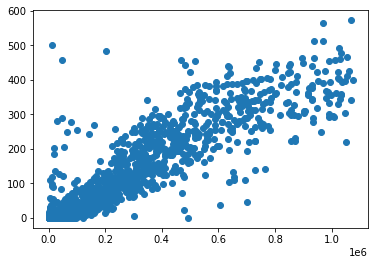

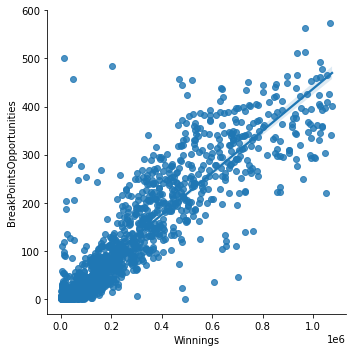

In [18]:
plt.scatter(df['Winnings'], df['BreakPointsOpportunities'])
sns.lmplot(data=df, x='Winnings', y='BreakPointsOpportunities')

[0.88 0.84 0.83 ... 0.4  0.37 0.36]


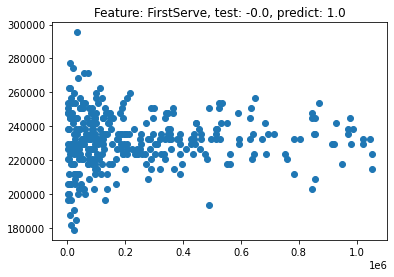

[0.5  0.62 0.6  ... 0.64 0.3  0.5 ]


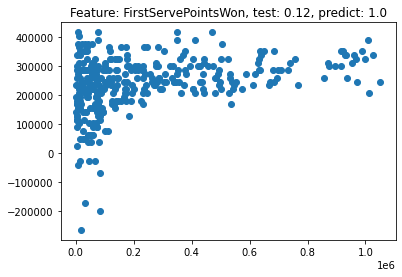

[0.38 0.26 0.28 ... 0.21 0.15 0.4 ]


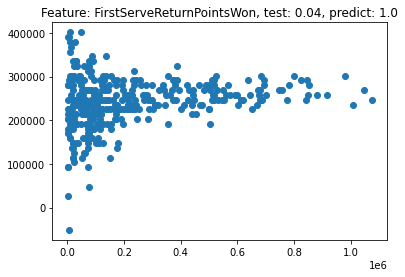

[0.5  0.33 0.53 ... 0.42 0.24 0.24]


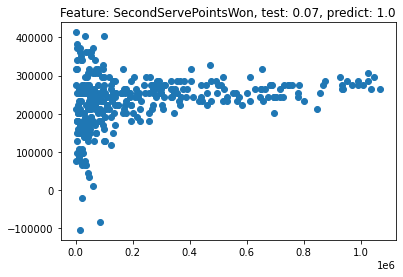

[0.39 0.07 0.44 ... 0.42 0.41 0.36]


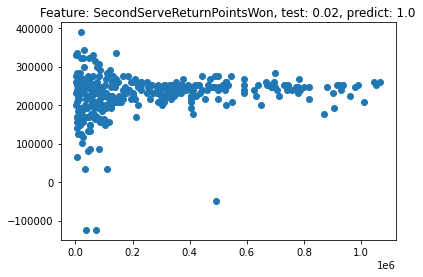

[0 7 2 ... 4 1 1]


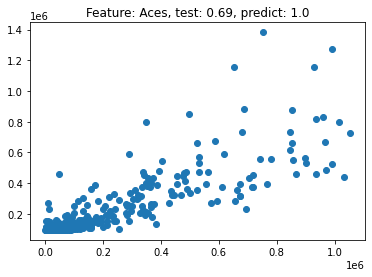

[0.14 0.   0.38 ... 0.25 0.   0.33]


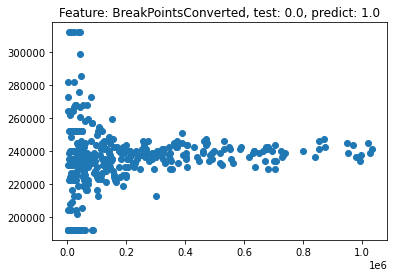

[ 7  7 10 ... 13  5  8]


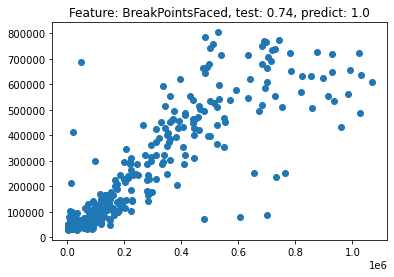

[7 0 8 ... 4 5 9]


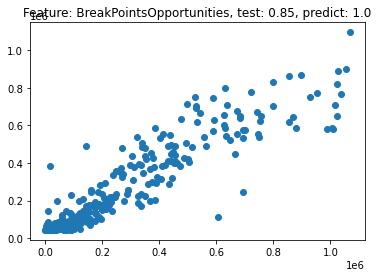

[0.43 0.57 0.4  ... 0.54 0.   0.25]


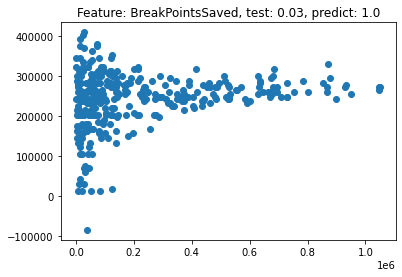

[2 1 1 ... 4 1 7]


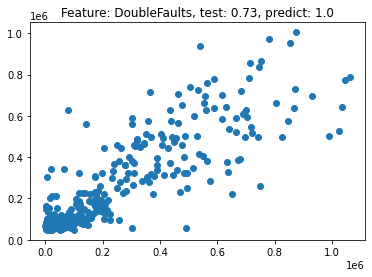

[ 9  9 19 ... 14  7  9]


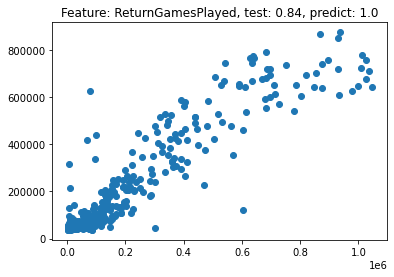

[0.11 0.   0.16 ... 0.07 0.   0.33]


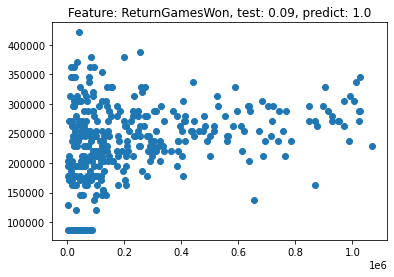

[0.38 0.2  0.34 ... 0.29 0.26 0.39]


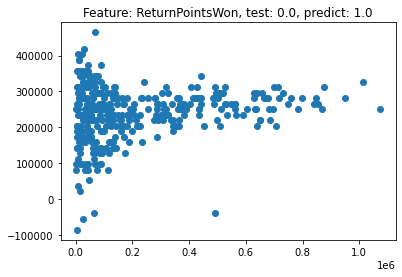

[ 8  9 17 ... 14  6  8]


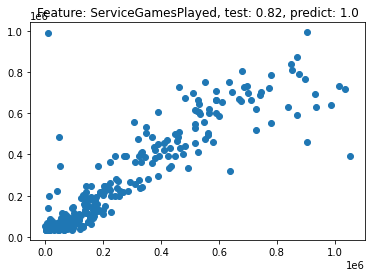

[0.5  0.67 0.65 ... 0.57 0.17 0.25]


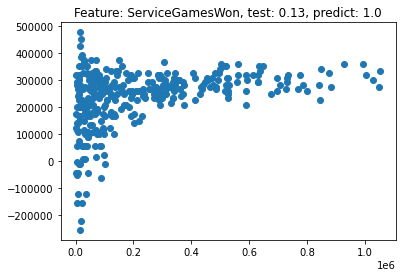

[0.43 0.41 0.45 ... 0.4  0.26 0.37]


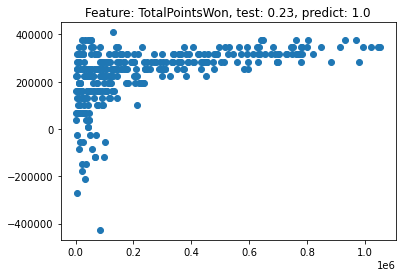

[0.5  0.57 0.59 ... 0.51 0.26 0.33]


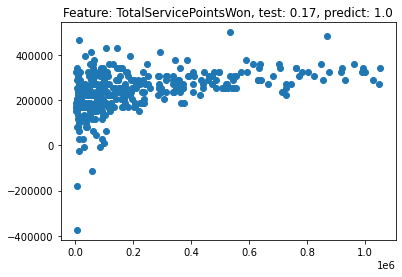

[1 0 4 ... 0 0 0]


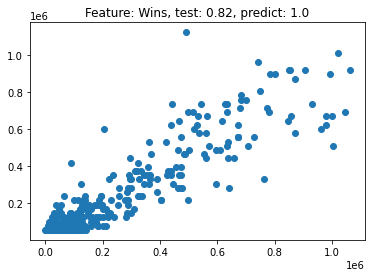

[2 1 1 ... 1 1 1]


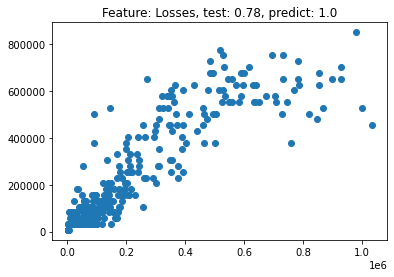

In [91]:
## perform single feature linear regressions here:
df_columns_truncated = ['FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses']
for feature in df_columns_truncated:
    temp_array1 = np.array(df[feature])
    temp_array2 = np.array(df['Winnings'])
    X = temp_array1.reshape(-1,1)
    y = temp_array2.reshape(-1, 1)
    print(temp_array1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)  
    lrg = LinearRegression()
    lrg.fit(X_train, y_train)
    y_predict = lrg.predict(X_test)
    plt.scatter(y_test, y_predict)
    score_test = lrg.score(X_test, y_test)
    score_predict = lrg.score(X_test, y_predict)
    plt.title(f'Feature: {feature}, test: {np.round(score_test,2)}, predict: {score_predict}')
    plt.show()

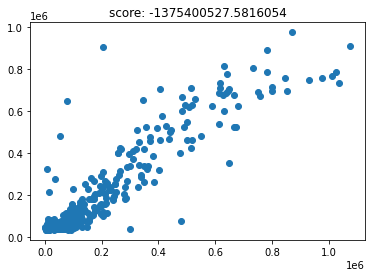

In [67]:
## perform two feature linear regressions here:
# Looking at the obove, I looked at just 2 +ve correlations
two_feature = ['ReturnGamesPlayed', 'Aces']
X = df[two_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
tlr = LinearRegression()
tlr.fit(X_train, y_train)
y_predict = tlr.predict(X_test)
#score = tlr.score(y_test, y_predict)
plt.scatter(y_test, y_predict)
plt.title(f'score: {score}')
plt.show()

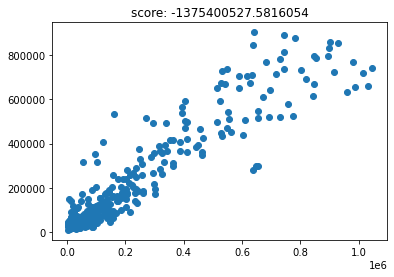

In [74]:
## perform multiple feature linear regressions here:
X = df[df_columns_truncated]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_predict = mlr.predict(X_test)
plt.scatter(y_test, y_predict)
plt.title(f'score: {score}')
plt.show()

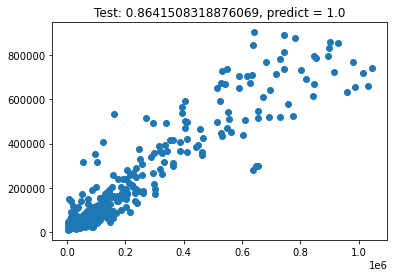

In [87]:
plt.scatter(y_test, y_predict)
score_test = mlr.score(X_test, y_test)
score_predict = mlr.score(X_test, y_predict)
plt.title(f'Test: {score_test}, predict = {score_predict}')
plt.show()